In [595]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [3]:
import pandas as pd
import numpy as np

In [355]:
df_youtube_comments = pd.read_csv("../csv/youtube_comments_concat.csv")

In [356]:
df_youtube_comments = df_youtube_comments.dropna()

In [357]:
df_youtube_comments[:5]

,_id,title,date,views,recommend,contents,reply,date_year,date_month,title_noun,dominant_topic_number,reply_clean_mecab,reply_clean_okt,reply_clean_mecab_withoutregion
0,6631d19b119b5f09bb9288e4,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,+해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...,2020,4,골방 신세 자 격리,2,해당 수익금 일부 민국 의료진 기부 상황 사태 조심 모두 격리 사회 거리 두기 신...,해당 영상 대한 수익금 일부 대한민국 의료 진 기부 점점 상황 사태 대한 조심성...,해당 수익금 일부 민국 의료진 기부 상황 사태 조심 모두 격리 사회 거리 두기 신...
1,6631d19b119b5f09bb9288e5,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,가족이라 껴안고도싶고 하겠지만 메뉴얼대로 공항에서부터 철저하게 격리절차 밟는과정은 ...,2020,4,골방 신세 자 격리,2,가족 메뉴 공항 철저 격리 절차 과정 시국 모습 부모 존경,가족 메뉴얼 공항 철 격리 절차 과정 정말 시국 모습 부모님 존경 스럽다,가족 뉴 공항 철저 격리 절차 과정 시국 모습 부모 존경
2,6631d19b119b5f09bb9288e6,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,평소에 조카한테 얼마나 잘해줫으면 저렇게 삼촌을 좋아하냐 ㅎㅎ 참 좋은사람이라는게...,2020,4,골방 신세 자 격리,2,평소 조카 삼촌 사람,평소 조카 얼마나 잘 줫으 삼촌 좋 좋다 사람 게 화팅,평소 조카 삼촌 사람
3,6631d19c119b5f09bb9288e7,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,와 눈물나... 2:20 나를 누구보다 아끼고 잘되길 바라는 우리의 부모님들.. 아...,2020,4,골방 신세 자 격리,2,눈물 부모 아들 방 플랜 카드 생각,누구 잘 우리 부모님 들 설레다 방 플랜카드 생각 하니 벅차다,눈물 부모 아들 방 플랜 카드 생각
4,6631d19c119b5f09bb9288e8,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,부모님이 세계여행 응원해주시고 믿어주신거 대단하시네요. 플랜카드까지 달아놓아주신거랑...,2020,4,골방 신세 자 격리,2,부모 세계 응원 플랜 카드 격리 창고 정리 센스,부모님 세계 여행 응원 대단 플랜카드 격리 창고 정리 센스 좋다,부모 세계 응원 플랜 카드 격리 창고 정리 센스


In [402]:
df_youtube_comments['reply'] =  df_youtube_comments['reply'].str.replace('파파트래블님', '')
df_youtube_comments['reply'] =  df_youtube_comments['reply'].str.replace('파파트래블님', '')


In [523]:
mecab.pos('예약 안하고')

[('예약', 'NNG'), ('안', 'MAG'), ('하', 'VV'), ('고', 'EC')]

In [524]:
from mecab import MeCab
mecab = MeCab()

def mecab_tag(sentence, mecab):
    # 명사, 동사, 어근 추출
    morphs = [morph for morph, tag in mecab.pos(sentence) if tag in ['NNG', 'VV', 'XR', 'MAG', 'VA', 'VV+EP+EC', 'VV+EP', 'MAG+VV']]
    return ' '.join(morphs)




In [525]:

df_youtube_comments['reply_clean_mecab'] = df_youtube_comments['reply'].apply(lambda x: mecab_tag(x, mecab))


In [526]:
df_reservation_comments = df_youtube_comments[df_youtube_comments['reply'].str.contains('예약')]

In [689]:
df_reservation_comments =  df_reservation_comments[~df_youtube_comments['reply'].str.contains('송풍 예약')]
df_reservation_comments =  df_reservation_comments[~df_youtube_comments['reply'].str.contains('☆ 장가계 패키지상품 링크는 아래 클릭')]

/tmp/ipykernel_93/3632964684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reservation_comments =  df_reservation_comments[~df_youtube_comments['reply'].str.contains('송풍 예약')]
/tmp/ipykernel_93/3632964684.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_reservation_comments =  df_reservation_comments[~df_youtube_comments['reply'].str.contains('☆ 장가계 패키지상품 링크는 아래 클릭')]


In [901]:
df_reservation_comments['reply'].iloc[0]

'근데 외국에서는 당일 예약하시는거 아무렇지않았는데 국내 여행은 항상 예약하고 움직이다보니 이상하면서 어색한데 그럴수도 있네 생각들면서 저도   아무렇게나 가보고싶어지네요\\n친구들과 함께하시니까 너무 즐거워보이셔서 좋으네요^^'

### 예약이 포함된 게시글에 대한 긍부정 분석

In [692]:
loaded_classification_model

RandomForestClassifier(n_jobs=-1)

In [693]:
loaded_tfidfVectorizer

TfidfVectorizer(ngram_range=(1, 2))

In [694]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 벡터라이저 생성 및 학습
X_train = loaded_tfidfVectorizer.transform(df_reservation_comments['reply_clean_mecab'])

# # 모델 생성 및 학습
df_reservation_comments['positive'] = loaded_svm_model.predict(X_train)


In [695]:
df_reservation_comments.columns

Index(['_id', 'title', 'date', 'views', 'recommend', 'contents', 'reply',
       'date_year', 'date_month', 'title_noun', 'dominant_topic_number',
       'reply_clean_mecab', 'reply_clean_okt',
       'reply_clean_mecab_withoutregion', 'positive'],
      dtype='object')

In [696]:
df_reservation_comments_extract = df_reservation_comments[['reply','reply_clean_mecab', 'positive']]

In [697]:
df_reservation_comments_extract['positive']

669      1
2298     1
3322     0
4291     1
6401     0
        ..
33197    1
33386    1
33492    1
34043    0
34168    1
Name: positive, Length: 380, dtype: int64

In [698]:
df_reservation_comments_extract[df_reservation_comments_extract['positive']==0]['reply']

3322     와우! 원래 어제 오늘 부산 갈라고 예약했다가 일이 있어서 취소했는데 대신 다녀오셨...
6401     시댁친정이 보령인데 딸아이 방학하고 두번\n다녀와 놓고선 21일에 또 대천에 예약했...
7066     1~2월, 봄, 가을마다 몇코스씩 걸으며 완주하고, 두번째로 돌고있는 올레꾼이예요^...
9795     어머님 동반운전자 지정안하면 (그린카 가입해야됨) 사고시에 보험처리안되고 그린카측에...
14725    송대소 물윗길 지금은 코로나로 이용이 안된다고 하네요.. ㅠㅠ  10월 중순경에 다...
16571    물론 현재 예약하면 성수기라 2인기준 85000원이지만 평일.주말 상관없고, 인당 ...
16695    안녕하세요~  숙박예약 안하고 당일치기로 갔다오는 것도 가능한지 궁금하네요.  그냥...
16730    여기 온라인 예약만 가능해요 전화예약 불가!!\n국립공원공단 예약시스템으로 검색하면...
16885    리뷰를 체크하시고 예약해야겠네요. 취사 안되고 TV없고 (당근 인터넷 없겠죠) 벌레...
16992    너무 좋아보여서 바로 예약하고 오늘 이용하고 있는중 입니다. 경기도권에 살아서 한시...
16996    여기 별로에요  그돈으로  주변 시설좋은 찜바에서 찜질하고  삼겹살 식당에서 먹는게...
17026    영상보고 2월에 예약 했는데 예약이 체계적이지 못한것같아요 ㅠㅠ 펜션측에서 날짜 혼...
17377    방금 전화통화 해 봤는데, \n아직 홈페이지에 안 올라간거 맞고, \n9월 예약은 ...
17551    여기어때에서숙박비 15만원결제하고 하루전에 바베큐예약이안됐다고 저녁패스당하고 아침1...
17562     영상 잘 보고 있습니다.\n\n덕분에 좋은 민박, 팬션 정보 얻고 있는데 이번에 ...
17628    ※ 민박 가시는 분들은 꼭 확인 부탁드립니다\n무한리필 바베큐 예약은 입실전날 오전...
18046    여기는 또 멏인 이상일까요?   예약 가능한 최소 인원도  알려주세요   주말 예약.

In [699]:
df_reservation_comments_extract = df_reservation_comments_extract[~df_reservation_comments_extract['reply'].str.contains('제주도 최저가 렌터카 예약 안내')]
df_reservation_comments_extract = df_reservation_comments_extract[~df_reservation_comments_extract['reply'].str.contains('구독과 좋아요 댓글은 다음 영상을 만드는데 큰 힘이 된답니다.')]
df_reservation_comments_extract = df_reservation_comments_extract[~df_reservation_comments_extract['reply'].str.contains('송풍')]
df_reservation_comments_extract = df_reservation_comments_extract[~df_reservation_comments_extract['reply'].str.contains('구독과 좋아요 댓글은 다음 영상을 만드는데 큰 힘이 된답니다.')]

In [953]:
df_reservation_comments_positive = df_reservation_comments_extract[df_reservation_comments_extract['positive']==1]

In [701]:
df_reservation_comments_positive

,reply,reply_clean_mecab,positive
669,근데 외국에서는 당일 예약하시는거 아무렇지않았는데 국내 여행은 항상 예약하고 움직이...,외국 당일 예약 아무렇 국내 여행 항상 예약 움직이 이상 어색 있 생각 들 아무렇 ...,1
2298,서울 상암동이나 연희동 연남동 성산동 쪽이좋은데 쫌 자연이 보이는 곳으로...,좋 자연 보이 곳 가지 영상 예약 집 나오,1
4291,제이님\n저랑 아산병원 같은과 동창이네요^^\n또한 그 호떡 \n좋은결과 듣고\n하...,병원 같 과 동창 호떡 좋 결과 듣 먹 세상 넘 넘 행복 좋 결과 해외여행 예약 기...,1
6568,주말에 srt 공주 예약 ㅎㅎㅎ 애하고 다닐건데 srt위주로 여행두 많이있으면 좋겠어요.,주말 공주 예약 애 위주 여행 많이 있 좋,1
7995,오~~~메이양! \n오랜만이네요. 메이양 영상방에 가끔식 들어와 봅니다.\n영상이...,오랜만 이양 영상 방 가끔 식 영상 안 때 안부 궁금 하 겨울 예약 전 사계 카메라...,1
...,...,...,...
33140,예약하는 방법 좀 알려주세요?,예약 방법 좀,1
33197,옥천ㅡ금강수변침수공원ㆍ수생식물 학습원 (꼭예약) 화인 살림욕장\n상춘정 (밤 은...,옥천 학습원 꼭 예약 화인 살림 욕장 춘정 밤 은하수 인기 사진 작가 인기 코스 부...,1
33386,주말에 배편예약해서 가야되나요?\n차를싣고가도 되나요?,주말 배편 예약 되 차 싣 되,1
33492,통영! 안가본지 꽤 됐는데 이렇게 보니 날잡고 가고 싶네요ㅠㅠ 통영에도 좋은 숙소가...,통영 안 꽤 됐 이렇게 보 날 잡 통영 좋 숙소 많 알 당장 예약 오 영상 전망대 ...,1


In [828]:
df_reservation_comments_extract = df_reservation_comments_extract.reset_index().drop(columns='index')

In [829]:
df_reservation_comments_positive = df_reservation_comments_positive.reset_index().drop(columns='index')

In [830]:
df_reservation_comments_negative = df_reservation_comments_extract[df_reservation_comments_extract['positive']==0].reset_index().drop(columns='index')

#### csv로 내보내기

In [831]:
df_reservation_comments_extract.to_csv('reservation_positive.csv',index=False)

### 예약에 대한 긍정 내용 topic 분석

In [973]:
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [974]:
feature = loaded_tfidfVectorizer.transform(df_reservation_comments_positive['reply_clean_mecab'])

In [975]:
components_2  = LatentDirichletAllocation(n_components=2, n_jobs=-1) # n_components => topic 가짓수 결정 / n_jobs =>성능높이기
components_2.fit(feature)

LatentDirichletAllocation(n_components=2, n_jobs=-1)

In [976]:
vis = pyLDAvis.lda_model.prepare(components_2, feature, loaded_tfidfVectorizer) # 토픽모델, 교육이 끝난 값(행렬형태), 교육모델

In [977]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis) # PCA - 차원축소

In [978]:
topics_output = components_2.transform(feature)
df_topics_score = pd.DataFrame(data=topics_output)
dictionary_list = loaded_tfidfVectorizer.get_feature_names_out(feature)
dictionary_list
## 상위 단어 추출
## 0 확률 1은 dictionary
topics_list = list()
for topic in components_2.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic1', 'Topic2']]
df_topics_keywords = pd.DataFrame(topics_list_add)

import numpy as np
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)

df_reservation_comments_positive['topic'] =df_topics_score['dominant_topic_number']

예약 방법 방법 번호 부탁 전화 어찌 민박 예약 마감 문의 자세
예약 영상 감사 주말 너무 예약 가능 가능 미리 예약 정보 감사 많이


/tmp/ipykernel_93/3161253640.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reservation_comments_positive['topic'] =df_topics_score['dominant_topic_number']


In [979]:
df_reservation_comments_positive.groupby('topic').count()

,reply,reply_clean_mecab,positive
topic,,,
0.0,44,44,44
1.0,269,269,269


In [980]:
df_topics_keywords

,0,1
0,예약 방법 방법 번호 부탁 전화 어찌 민박 예약 마감 문의 자세,예약 영상 감사 주말 너무 예약 가능 가능 미리 예약 정보 감사 많이
1,Topic1,Topic2


In [981]:
df_reservation_comments_positive.query('topic==0')

,reply,reply_clean_mecab,positive,topic
9,울릉도가 시댁인데 자주 못가서 이리 풍경으로 보니 반갑네요~ 울릉도 좁고 교통이 나...,시댁 자주 못 가 이리 풍경 보 반갑 좁 교통 서로 서로 잘 시즌 외국인 외지인 잠...,1,0.0
35,예약하기가 어렵네요 예약 잘할수있는 비결알려주세요~~,예약 어렵 예약 잘 있 비결,1,0.0
45,자연휴양림 예약하기 힘들던데 \n여기 예약할때 숲나들e에서 하나요?,자연 휴양림 예약 힘들 예약 때 숲 하,1,0.0
47,여기가려면 어디로 가나 하나요\n예약하고 가나요?,가 가 하 예약,1,0.0
56,예약하기가 여기도 하늘의별따기네요 ㅠ,예약 하늘 별 따,1,0.0
75,좋은영상 감사합니다.\n칠곡 숲체험 예약방법과 꿀팁 알려주세요.,좋 영상 감사 숲 체험 예약 방법 꿀 팁,1,0.0
77,예약은 어떻게하나요?알여주세요,예약 어떻게 하 알,1,0.0
106,여기 예약할려면 어떻게해야하나요,예약 어떻게 하,1,0.0
109,요번주말 대구가는데 딱이네요 가봐야겠네요 예약이 될런지 ᆢ,요번 주말 대 딱 예약,1,0.0
111,와~ 예약하기 어렵다던데 그어려운걸 해냈네요 !! 짝짝짝,예약 어렵 해냈 짝짝 짝,1,0.0


In [982]:
df_reservation_comments_positive.query('topic==1')

,reply,reply_clean_mecab,positive,topic
0,근데 외국에서는 당일 예약하시는거 아무렇지않았는데 국내 여행은 항상 예약하고 움직이...,외국 당일 예약 아무렇 국내 여행 항상 예약 움직이 이상 어색 있 생각 들 아무렇 ...,1,1.0
1,서울 상암동이나 연희동 연남동 성산동 쪽이좋은데 쫌 자연이 보이는 곳으로...,좋 자연 보이 곳 가지 영상 예약 집 나오,1,1.0
3,제이님\n저랑 아산병원 같은과 동창이네요^^\n또한 그 호떡 \n좋은결과 듣고\n하...,병원 같 과 동창 호떡 좋 결과 듣 먹 세상 넘 넘 행복 좋 결과 해외여행 예약 기...,1,1.0
5,주말에 srt 공주 예약 ㅎㅎㅎ 애하고 다닐건데 srt위주로 여행두 많이있으면 좋겠어요.,주말 공주 예약 애 위주 여행 많이 있 좋,1,1.0
7,오~~~메이양! \n오랜만이네요. 메이양 영상방에 가끔식 들어와 봅니다.\n영상이...,오랜만 이양 영상 방 가끔 식 영상 안 때 안부 궁금 하 겨울 예약 전 사계 카메라...,1,1.0
...,...,...,...,...
329,덕분에 돌아오는 주\n금요일 예약 잘 했습니다.\n잘 다녀올게요\n감사합니다,덕분 돌아오 주 금요일 예약 잘 했 잘 감사,1,1.0
331,예약을 어떻게 하나요~?,예약 어떻게,1,1.0
332,버스예약은 어디서 하는지요,버스 예약 하,1,1.0
333,예약 방법 문의,예약 방법 문의,1,1.0


In [983]:
df_reservation_comments_positive = df_reservation_comments_positive.query('topic==0').reset_index().drop(columns='index')

### 전체내용

In [984]:
feature = loaded_tfidfVectorizer.transform(df_reservation_comments_extract['reply_clean_mecab'])

In [985]:
components_2  = LatentDirichletAllocation(n_components=2, n_jobs=-1) # n_components => topic 가짓수 결정 / n_jobs =>성능높이기
components_2.fit(feature)

LatentDirichletAllocation(n_components=2, n_jobs=-1)

In [986]:
vis = pyLDAvis.lda_model.prepare(components_2, feature, loaded_tfidfVectorizer) # 토픽모델, 교육이 끝난 값(행렬형태), 교육모델

In [987]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis) # PCA - 차원축소

In [988]:
topics_output = components_2.transform(feature)
df_topics_score = pd.DataFrame(data=topics_output)

In [989]:
dictionary_list = loaded_tfidfVectorizer.get_feature_names_out(feature)
dictionary_list

array(['arrival', 'arrival date', 'com', ..., '힘쓰다 바라다', '힘쓰다 보임', '힙니'],
      dtype=object)

In [990]:
## 상위 단어 추출
## 0 확률 1은 dictionary
topics_list = list()
for topic in components_2.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:20])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic1', 'Topic2']]
df_topics_keywords = pd.DataFrame(topics_list_add)

예약 영상 주말 너무 예약 가능 가능 미리 예약 민박 미리 많이 내년 가격 기대 바로 전화 정도 이상 소개 여행 감사
예약 감사 예약 방법 방법 정보 감사 정보 가족 부탁 평일 하늘 전화 마감 예약 마감 문의 홈페이지 휴가 숙박 올해 번호 정말


In [991]:
import numpy as np
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)

In [992]:
df_reservation_comments_extract['topic'] =df_topics_score['dominant_topic_number']

In [993]:
df_reservation_comments_extract.groupby('topic').count()

,reply,reply_clean_mecab,positive
topic,,,
0,161,161,161
1,203,203,203


In [997]:
df_reservation_comments_extract.query('topic==0')

,reply,reply_clean_mecab,positive,topic
0,근데 외국에서는 당일 예약하시는거 아무렇지않았는데 국내 여행은 항상 예약하고 움직이...,외국 당일 예약 아무렇 국내 여행 항상 예약 움직이 이상 어색 있 생각 들 아무렇 ...,1,0
1,서울 상암동이나 연희동 연남동 성산동 쪽이좋은데 쫌 자연이 보이는 곳으로...,좋 자연 보이 곳 가지 영상 예약 집 나오,1,0
3,제이님\n저랑 아산병원 같은과 동창이네요^^\n또한 그 호떡 \n좋은결과 듣고\n하...,병원 같 과 동창 호떡 좋 결과 듣 먹 세상 넘 넘 행복 좋 결과 해외여행 예약 기...,1,0
5,주말에 srt 공주 예약 ㅎㅎㅎ 애하고 다닐건데 srt위주로 여행두 많이있으면 좋겠어요.,주말 공주 예약 애 위주 여행 많이 있 좋,1,0
6,"1~2월, 봄, 가을마다 몇코스씩 걸으며 완주하고, 두번째로 돌고있는 올레꾼이예요^...",봄 가을 코스 완주 돌 올레 봄 예약 취소 반복 이번 주말 내려갔 올라왔 여름 올레...,0,0
...,...,...,...,...
354,제가 부산여행을 자주 가는데 하도 갈 곳이 많아서 한 번 가면 몇 군데씩 나눠서 갑...,여행 자주 가 하도 곳 많 가 거제 남 통영 크 고민 없이 유명 여행지 둘러보 자체...,1,0
360,주말에 배편예약해서 가야되나요?\n차를싣고가도 되나요?,주말 배편 예약 되 차 싣 되,1,0
361,통영! 안가본지 꽤 됐는데 이렇게 보니 날잡고 가고 싶네요ㅠㅠ 통영에도 좋은 숙소가...,통영 안 꽤 됐 이렇게 보 날 잡 통영 좋 숙소 많 알 당장 예약 오 영상 전망대 ...,1,0
362,이 영상을 6월에 봤어야 했는데... ㅠㅠ 지금은 코로나 때문에 예약불가 ㅠㅠ,영상 봤 지금 예약 불가,0,0


In [998]:
df_reservation_comments_extract.query('topic==1')

,reply,reply_clean_mecab,positive,topic
2,와우! 원래 어제 오늘 부산 갈라고 예약했다가 일이 있어서 취소했는데 대신 다녀오셨...,원래 어제 오늘 갈라고 예약 일 있 취소 대신 다녀오 족,0,1
4,시댁친정이 보령인데 딸아이 방학하고 두번\n다녀와 놓고선 21일에 또 대천에 예약했...,시댁 친정 보령 딸아이 방학 또 대천 예약 취소 동해 가 마음 댓글 숙소 예약 일정...,0,1
8,잘보고있어요\n나이는 53살이구요 애들키운다고 집사람과둘이 어디여행못갔어요 큰애 이...,잘 보 나이 애 집사람 여행 못 갔 애 이번 대학 가 처음 집사람 여행 집사람 꽃 ...,1,1
14,와 숙소예약 안하고 간게 신의 한수였네요!!,숙소 예약 안 하 신 한수,1,1
21,해운대 암소 갈비집 시그니처인 생갈비는 예약 안하면 못 먹어요 ㅎㅎ,해운대 암소 갈비 집 처 갈비 예약 안 하 못 먹,1,1
...,...,...,...,...
355,☆★☆ 핵심 정보 ☆★☆\n 울릉도 배편? [ 대저페리 ]\n - 엘도라도...,핵심 정보 배편 대저 페리 엘도 가 가장 빠르 쾌속 여객선 여행 가장 쾌속 여객선 ...,0,1
356,☆★☆ 메모 ☆★☆\n (경주) 골굴사 – 국내 유일의 석굴사원\n - 주...,메모 골 굴 사 국내 유일 석굴 사원 주차 자체 주차장 무료 예술 랜드 다스 손 요...,0,1
357,☆★☆ 여행지 상세 정보 ☆★☆\n 철원 한탄강 물윗길\n - 입장료 :...,여행지 상세 정보 철원 탄강 물 윗길 입장료 성인 청소년 어린이 철원 사랑 상품권 ...,1,1
358,예약하는 방법 좀 알려주세요?,예약 방법 좀,1,1


### 예약에 대한 부정 내용 topic 분석

In [916]:
feature = loaded_tfidfVectorizer.transform(df_reservation_comments_negative['reply_clean_mecab'])

In [917]:
components_2  = LatentDirichletAllocation(n_components=2, n_jobs=-1) # n_components => topic 가짓수 결정 / n_jobs =>성능높이기
components_2.fit(feature)

LatentDirichletAllocation(n_components=2, n_jobs=-1)

In [918]:
vis = pyLDAvis.lda_model.prepare(components_2, feature, loaded_tfidfVectorizer) # 토픽모델, 교육이 끝난 값(행렬형태), 교육모델

In [919]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis) # PCA - 차원축소

In [924]:
topics_output = components_2.transform(feature)
df_topics_score = pd.DataFrame(data=topics_output)
dictionary_list = loaded_tfidfVectorizer.get_feature_names_out(feature)
dictionary_list
## 상위 단어 추출
## 0 확률 1은 dictionary
topics_list = list()
for topic in components_2.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic1', 'Topic2']]
df_topics_keywords = pd.DataFrame(topics_list_add)

import numpy as np
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)

df_reservation_comments_negative['topic'] =df_topics_score['dominant_topic_number']

운전 청구 사고 동반 지정 보험 본인 처리 가입 정도
예약 너무 영상 시간 운영 전화 홈페이지 가능 불가 예약 취소


In [925]:
df_topics_keywords

,0,1
0,운전 청구 사고 동반 지정 보험 본인 처리 가입 정도,예약 너무 영상 시간 운영 전화 홈페이지 가능 불가 예약 취소
1,Topic1,Topic2


In [926]:
df_reservation_comments_negative.groupby('topic').count()

,reply,reply_clean_mecab,positive
topic,,,
0,1,1,1
1,28,28,28


In [923]:
df_reservation_comments_negative.query('topic==1')

,reply,reply_clean_mecab,positive,topic
0,와우! 원래 어제 오늘 부산 갈라고 예약했다가 일이 있어서 취소했는데 대신 다녀오셨...,원래 어제 오늘 갈라고 예약 일 있 취소 대신 다녀오 족,0,1
1,시댁친정이 보령인데 딸아이 방학하고 두번\n다녀와 놓고선 21일에 또 대천에 예약했...,시댁 친정 보령 딸아이 방학 또 대천 예약 취소 동해 가 마음 댓글 숙소 예약 일정...,0,1
2,"1~2월, 봄, 가을마다 몇코스씩 걸으며 완주하고, 두번째로 돌고있는 올레꾼이예요^...",봄 가을 코스 완주 돌 올레 봄 예약 취소 반복 이번 주말 내려갔 올라왔 여름 올레...,0,1
4,송대소 물윗길 지금은 코로나로 이용이 안된다고 하네요.. ㅠㅠ 10월 중순경에 다...,대소 물 윗길 지금 이용 안 순경 다시 전화 안내 받 정식 말 구간 개방 예정 약제...,0,1
5,"물론 현재 예약하면 성수기라 2인기준 85000원이지만 평일.주말 상관없고, 인당 ...",물론 현재 예약 성수기 평일 주말 상관없 인 내면 더 최대 인 인 가족 체험 프로그...,0,1
6,안녕하세요~ 숙박예약 안하고 당일치기로 갔다오는 것도 가능한지 궁금하네요. 그냥...,안녕 숙박 예약 안 하 당일 치 갔다오 가능 궁금 그냥 산책 별도 비용 없이 가능 ...,0,1
7,여기 온라인 예약만 가능해요 전화예약 불가!!\n국립공원공단 예약시스템으로 검색하면...,온라인 예약 가능 전화 예약 불가 국립 공원 공단 예약 시스템 검색,0,1
8,리뷰를 체크하시고 예약해야겠네요. 취사 안되고 TV없고 (당근 인터넷 없겠죠) 벌레...,체크 예약 취사 안 되 없 당근 인터넷 없 벌레 생각 많 불편 많,0,1
9,너무 좋아보여서 바로 예약하고 오늘 이용하고 있는중 입니다. 경기도권에 살아서 한시...,너무 좋 바로 예약 오늘 이용 살 시간 도착 상상 보다 너무 좋 친구 바로 추천 사...,0,1
10,여기 별로에요 그돈으로 주변 시설좋은 찜바에서 찜질하고 삼겹살 식당에서 먹는게...,별로 돈 주변 시설 좋 찜 바 찜질 삼겹살 식당 먹 나 오랜만 언니 여행 가 찾 예...,0,1


#### 부정 내용으로 워드클라우드 만들기

#### 빈도

In [930]:
morphs_nouns = []
morphs_nouns_list = []
for row in df_reservation_comments_negative['reply']:
    morphs = [morph for morph, tag in mecab.pos(row) if tag in ['NNG', 'VV', 'XR', 'MAG', 'VA', 'VV+EP+EC', 'VV+EP']]
    morphs_nouns.append(morphs)
    morphs_nouns_list = morphs_nouns_list + morphs # 감정분석할 땐, 부사/형용사 등등도 포함
    pass


In [931]:
morphs_nouns_list

['원래',
 '어제',
 '오늘',
 '갈라고',
 '예약',
 '일',
 '있',
 '취소',
 '대신',
 '다녀오',
 '족',
 '시댁',
 '친정',
 '보령',
 '딸아이',
 '방학',
 '또',
 '대천',
 '예약',
 '취소',
 '동해',
 '가',
 '마음',
 '댓글',
 '숙소',
 '예약',
 '일정',
 '있',
 '숙소',
 '괜찮',
 '동선',
 '하',
 '동선',
 '일정',
 '잘못',
 '짜',
 '봄',
 '가을',
 '코스',
 '완주',
 '돌',
 '올레',
 '봄',
 '예약',
 '취소',
 '반복',
 '이번',
 '주말',
 '내려갔',
 '올라왔',
 '여름',
 '올레',
 '봄',
 '가을',
 '배',
 '힘들',
 '습하',
 '덥',
 '간',
 '코스',
 '걸',
 '봄',
 '너무',
 '너무',
 '좋',
 '하',
 '곳',
 '힘',
 '눈',
 '덜',
 '앞',
 '봄',
 '가을',
 '겨울',
 '바람',
 '조심',
 '너무',
 '좋',
 '에',
 '풀코스',
 '걷',
 '여름',
 '반',
 '걷',
 '물놀',
 '다',
 '짐',
 '며칠',
 '계속',
 '하루',
 '마무리',
 '물놀',
 '날씨',
 '패킹',
 '하',
 '걷',
 '대단',
 '응원',
 '의미',
 '구독',
 '누르',
 '어머님',
 '동반',
 '운전자',
 '지정',
 '안',
 '하',
 '가입',
 '사고',
 '보험',
 '처리',
 '안',
 '되',
 '벌금',
 '정도',
 '청구',
 '있',
 '본인',
 '운전',
 '대소',
 '물',
 '윗길',
 '지금',
 '이용',
 '안',
 '순경',
 '다시',
 '전화',
 '안내',
 '받',
 '정식',
 '말',
 '구간',
 '개방',
 '예정',
 '약제',
 '하',
 '당일',
 '현장',
 '발매',
 '같',
 '물론',
 '현재',
 '예약',
 '성수기',
 '평일',
 '주말',
 '상관없'

In [932]:
morphs_nouns_list_pre = []
for morphs_nouns in morphs_nouns_list:
    if morphs_nouns not in ['있', '없', '좋', '예약', '하', '갔']:
        morphs_nouns_list_pre.append(morphs_nouns)

In [933]:
text_split_count = Counter(morphs_nouns_list_pre)

In [934]:
negative_count = pd.Series(text_split_count).sort_values(ascending=False)

In [935]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(negative_count)

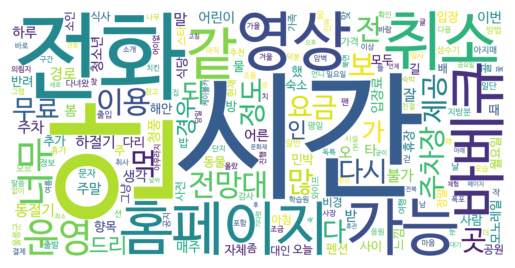

In [936]:
highlighted_words = ["전화","안"]
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

wordCloud = WordCloud(scale=10, background_color="white",font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(negative_count)
# wordCloud.words
# wordCloud.generate_from_frequencies()

plt.imshow(wordCloud)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [937]:
df_reservation_comments_negative[df_reservation_comments_negative['reply'].str.contains('안')]

,reply,reply_clean_mecab,positive,topic
3,어머님 동반운전자 지정안하면 (그린카 가입해야됨) 사고시에 보험처리안되고 그린카측에...,어머님 동반 운전자 지정 안 하 가입 사고 보험 처리 안 되 벌금 정도 청구 있 본...,0,0
4,송대소 물윗길 지금은 코로나로 이용이 안된다고 하네요.. ㅠㅠ 10월 중순경에 다...,대소 물 윗길 지금 이용 안 순경 다시 전화 안내 받 정식 말 구간 개방 예정 약제...,0,1
5,"물론 현재 예약하면 성수기라 2인기준 85000원이지만 평일.주말 상관없고, 인당 ...",물론 현재 예약 성수기 평일 주말 상관없 인 내면 더 최대 인 인 가족 체험 프로그...,0,1
6,안녕하세요~ 숙박예약 안하고 당일치기로 갔다오는 것도 가능한지 궁금하네요. 그냥...,안녕 숙박 예약 안 하 당일 치 갔다오 가능 궁금 그냥 산책 별도 비용 없이 가능 ...,0,1
8,리뷰를 체크하시고 예약해야겠네요. 취사 안되고 TV없고 (당근 인터넷 없겠죠) 벌레...,체크 예약 취사 안 되 없 당근 인터넷 없 벌레 생각 많 불편 많,0,1
10,여기 별로에요 그돈으로 주변 시설좋은 찜바에서 찜질하고 삼겹살 식당에서 먹는게...,별로 돈 주변 시설 좋 찜 바 찜질 삼겹살 식당 먹 나 오랜만 언니 여행 가 찾 예...,0,1
11,영상보고 2월에 예약 했는데 예약이 체계적이지 못한것같아요 ㅠㅠ 펜션측에서 날짜 혼...,영상 보 예약 예약 체계 같 펜션 날짜 혼동 같 왜 안 오 나무라 전화 미안 안 하...,0,1
12,"방금 전화통화 해 봤는데, \n아직 홈페이지에 안 올라간거 맞고, \n9월 예약은 ...",방금 전화 통화 아직 홈페이지 안 맞 예약 받 말씀 홈페이지 진행 되 아직 안 진행...,0,1
13,여기어때에서숙박비 15만원결제하고 하루전에 바베큐예약이안됐다고 저녁패스당하고 아침1...,때 숙박비 결제 하루 전 바베큐 예약 안 됐 저녁 패스 아침 아침 식사 인 안 이유...,0,1
14,"영상 잘 보고 있습니다.\n\n덕분에 좋은 민박, 팬션 정보 얻고 있는데 이번에 ...",영상 잘 보 덕분 좋 민박 팬 션 정보 얻 이번 어이없 경우 알 좋 같 글 남기 꽃...,0,1


#### 긍정 내용으로 토픽 만들기

In [964]:
morphs_nouns = []
morphs_nouns_list = []
for row in df_reservation_comments_positive['reply']:
    morphs = [morph for morph, tag in mecab.pos(row) if tag in ['NNG', 'VV', 'XR', 'MAG', 'VA', 'VV+EP+EC', 'VV+EP']]
    morphs_nouns.append(morphs)
    morphs_nouns_list = morphs_nouns_list + morphs # 감정분석할 땐, 부사/형용사 등등도 포함
    pass


In [965]:
morphs_nouns_list

['외국',
 '당일',
 '예약',
 '아무렇',
 '국내',
 '여행',
 '항상',
 '예약',
 '움직이',
 '이상',
 '어색',
 '있',
 '생각',
 '들',
 '아무렇',
 '친구',
 '함께',
 '하',
 '너무',
 '보이',
 '좋',
 '좋',
 '자연',
 '보이',
 '곳',
 '가지',
 '영상',
 '예약',
 '집',
 '나오',
 '병원',
 '같',
 '과',
 '동창',
 '호떡',
 '좋',
 '결과',
 '듣',
 '먹',
 '세상',
 '넘',
 '넘',
 '행복',
 '좋',
 '결과',
 '해외여행',
 '예약',
 '기대',
 '설',
 '렙',
 '니',
 '주말',
 '공주',
 '예약',
 '애',
 '위주',
 '여행',
 '많이',
 '있',
 '좋',
 '오랜만',
 '이양',
 '영상',
 '방',
 '가끔',
 '식',
 '영상',
 '안',
 '때',
 '안부',
 '궁금',
 '하',
 '겨울',
 '예약',
 '전',
 '사계',
 '카메라',
 '담',
 '아직',
 '사진',
 '얻',
 '계속',
 '가',
 '시작',
 '일종',
 '의식',
 '계시',
 '동문',
 '시장',
 '저녁',
 '같이',
 '하',
 '좋',
 '잘',
 '보',
 '나이',
 '애',
 '집사람',
 '여행',
 '못',
 '갔',
 '애',
 '이번',
 '대학',
 '가',
 '처음',
 '집사람',
 '여행',
 '집사람',
 '꽃',
 '구경',
 '맛집',
 '아',
 '없',
 '추천',
 '스케줄',
 '감사',
 '같',
 '숙소',
 '모르',
 '비행기',
 '예약',
 '시댁',
 '자주',
 '못',
 '가',
 '이리',
 '풍경',
 '보',
 '반갑',
 '좁',
 '교통',
 '서로',
 '서로',
 '잘',
 '시즌',
 '외국인',
 '외지인',
 '잠시',
 '일',
 '많이',
 '사건',
 '사고',
 '많이',
 '생기',
 '다음',
 '꼭',
 '숙소',


In [966]:
morphs_nouns_list_pre = []
for morphs_nouns in morphs_nouns_list:
    if morphs_nouns not in ['영상', '예약', '있', '하', '좋', '감사', '가', '되', '보']:
        morphs_nouns_list_pre.append(morphs_nouns)

In [967]:
text_split_count = Counter(morphs_nouns_list_pre)

In [968]:
negative_count = pd.Series(text_split_count).sort_values(ascending=False)

In [969]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(negative_count)

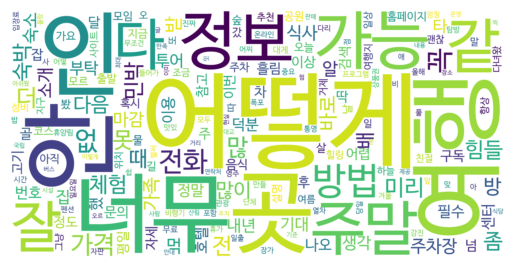

In [970]:
highlighted_words = ["어떻게", "가능", '너무', '안', '방법']
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

wordCloud = WordCloud(scale=10, background_color="white",font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(negative_count)
# wordCloud.words
# wordCloud.generate_from_frequencies()

plt.imshow(wordCloud)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [875]:
df_reservation_comments_positive[df_reservation_comments_positive['reply'].str.contains('어떻게')]

,reply,reply_clean_mecab,positive,topic


#### 전체 내용으로 토픽 만들기

In [876]:
morphs_nouns = []
morphs_nouns_list = []
for row in df_reservation_comments_extract['reply']:
    morphs = [morph for morph, tag in mecab.pos(row) if tag in ['NNG', 'VV', 'XR', 'MAG', 'VA', 'VV+EP+EC', 'VV+EP']]
    morphs_nouns.append(morphs)
    morphs_nouns_list = morphs_nouns_list + morphs # 감정분석할 땐, 부사/형용사 등등도 포함
    pass


In [877]:
morphs_nouns_list

['외국',
 '당일',
 '예약',
 '아무렇',
 '국내',
 '여행',
 '항상',
 '예약',
 '움직이',
 '이상',
 '어색',
 '있',
 '생각',
 '들',
 '아무렇',
 '친구',
 '함께',
 '하',
 '너무',
 '보이',
 '좋',
 '좋',
 '자연',
 '보이',
 '곳',
 '가지',
 '영상',
 '예약',
 '집',
 '나오',
 '원래',
 '어제',
 '오늘',
 '갈라고',
 '예약',
 '일',
 '있',
 '취소',
 '대신',
 '다녀오',
 '족',
 '병원',
 '같',
 '과',
 '동창',
 '호떡',
 '좋',
 '결과',
 '듣',
 '먹',
 '세상',
 '넘',
 '넘',
 '행복',
 '좋',
 '결과',
 '해외여행',
 '예약',
 '기대',
 '설',
 '렙',
 '니',
 '시댁',
 '친정',
 '보령',
 '딸아이',
 '방학',
 '또',
 '대천',
 '예약',
 '취소',
 '동해',
 '가',
 '마음',
 '댓글',
 '숙소',
 '예약',
 '일정',
 '있',
 '숙소',
 '괜찮',
 '동선',
 '하',
 '동선',
 '일정',
 '잘못',
 '짜',
 '주말',
 '공주',
 '예약',
 '애',
 '위주',
 '여행',
 '많이',
 '있',
 '좋',
 '봄',
 '가을',
 '코스',
 '완주',
 '돌',
 '올레',
 '봄',
 '예약',
 '취소',
 '반복',
 '이번',
 '주말',
 '내려갔',
 '올라왔',
 '여름',
 '올레',
 '봄',
 '가을',
 '배',
 '힘들',
 '습하',
 '덥',
 '간',
 '코스',
 '걸',
 '봄',
 '너무',
 '너무',
 '좋',
 '하',
 '곳',
 '힘',
 '눈',
 '덜',
 '앞',
 '봄',
 '가을',
 '겨울',
 '바람',
 '조심',
 '너무',
 '좋',
 '에',
 '풀코스',
 '걷',
 '여름',
 '반',
 '걷',
 '물놀',
 '다',
 '짐',
 '며칠',
 '계속',

In [878]:
morphs_nouns_list_pre = []
for morphs_nouns in morphs_nouns_list:
    if morphs_nouns not in ['영상', '예약', '있', '하', '좋', '감사', '가', '되', '보', '곳', '같', '전', '많', '여행', '너무']:
        morphs_nouns_list_pre.append(morphs_nouns)

In [879]:
text_split_count = Counter(morphs_nouns_list_pre)

In [880]:
negative_count = pd.Series(text_split_count).sort_values(ascending=False)

In [881]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(negative_count)

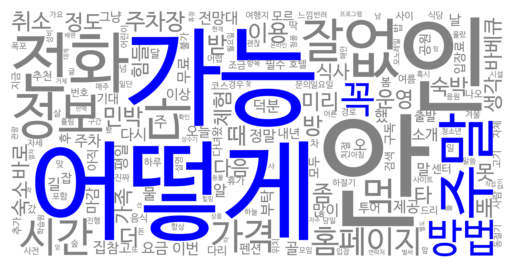

In [899]:
highlighted_words = ["어떻게", "가능", '방법', '주말', '꼭']
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in highlighted_words:
        return "blue"  # 특정 단어 색상
    else:
        return "gray"   # 나머지 단어 색상

wordCloud = WordCloud(scale=10, color_func=custom_color_func, background_color="white",font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf').generate_from_frequencies(negative_count)
# wordCloud.words
# wordCloud.generate_from_frequencies()

plt.imshow(wordCloud)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [971]:
df_reservation_comments_extract[df_reservation_comments_extract['reply'].str.contains('취소')][['reply', 'positive']]

,reply,positive
2,와우! 원래 어제 오늘 부산 갈라고 예약했다가 일이 있어서 취소했는데 대신 다녀오셨...,0
4,시댁친정이 보령인데 딸아이 방학하고 두번\n다녀와 놓고선 21일에 또 대천에 예약했...,0
6,"1~2월, 봄, 가을마다 몇코스씩 걸으며 완주하고, 두번째로 돌고있는 올레꾼이예요^...",0
117,3인 가족인데 셋이 가려면 2인방 1개 1인방 1개 해야해서 97만원으로 껑충 뛰네...,1
150,"영상 잘 보고 있습니다.\n\n덕분에 좋은 민박, 팬션 정보 얻고 있는데 이번에 ...",0
213,"영상 잘 보고 있습니다.\n덕분에 좋은 민박, 팬션 정보 얻고 있는데 이번에 어이...",0
340,저와 여행감성이 너무 일치하여 자주 들러 보고 있습니다. 감사합니다.\n소개해 주신...,0
344,7월 구례가려고 예약했다가 태풍으로 취소하고 다음을 기약하고 있는 중입니다 \n추천...,1


#### 2019

In [884]:
df_sheets_2019 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2019")['reply_clean_mecab'].items() :
  df_sheets_2019.append(df)

In [885]:
text = ' '.join(map(str, df_sheets_2019))
text_split = text.split()
text_split_count = Counter(text_split)

In [886]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [887]:
text_split_count

Counter({'좋': 1177,
         '영상': 866,
         '감사': 715,
         '보': 648,
         '여행': 640,
         '가': 576,
         '있': 500,
         '너무': 489,
         '곳': 446,
         '잘': 410,
         '하': 360,
         '같': 345,
         '여행지': 262,
         '많': 243,
         '정보': 239,
         '정말': 237,
         '꼭': 230,
         '때': 221,
         '넘': 210,
         '추천': 207,
         '안': 206,
         '되': 204,
         '없': 198,
         '많이': 194,
         '소개': 184,
         '진짜': 176,
         '더': 148,
         '대전': 147,
         '먹': 146,
         '다': 141,
         '국내': 140,
         '가을': 138,
         '오': 131,
         '갔': 128,
         '전': 127,
         '오늘': 124,
         '길': 124,
         '항상': 124,
         '못': 116,
         '봤': 114,
         '또': 108,
         '사람': 105,
         '구독': 101,
         '힐링': 98,
         '이번': 97,
         '겨울': 95,
         '설명': 94,
         '찍': 93,
         '이렇게': 92,
         '행복': 91,
         '집': 90,
         '생각

In [759]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

In [760]:
wordCloud.words_

{'좋': 1.0,
 '영상': 0.735768903993203,
 '감사': 0.6074766355140186,
 '보': 0.550552251486831,
 '여행': 0.5437553101104503,
 '가': 0.4893797790994053,
 '있': 0.42480883602378927,
 '너무': 0.4154630416312659,
 '곳': 0.37892948173322005,
 '잘': 0.34834324553950724,
 '하': 0.3058623619371283,
 '같': 0.2931180968564146,
 '여행지': 0.22259983007646558,
 '많': 0.2064570943075616,
 '정보': 0.20305862361937127,
 '정말': 0.20135938827527614,
 '꼭': 0.19541206457094307,
 '때': 0.18776550552251486,
 '넘': 0.1784197111299915,
 '추천': 0.17587085811384875,
 '안': 0.1750212404418012,
 '되': 0.17332200509770604,
 '없': 0.16822429906542055,
 '많이': 0.16482582837723025,
 '소개': 0.15632965165675447,
 '진짜': 0.14953271028037382,
 '더': 0.12574341546304163,
 '대전': 0.12489379779099405,
 '먹': 0.12404418011894647,
 '다': 0.11979609175870858}

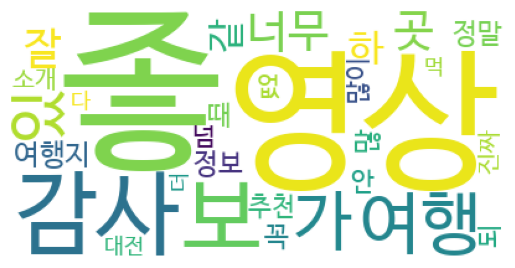

In [761]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 가을, 경주, 밀양, 길, 사람, 힐링
- 19년도엔 가을, 경주, 밀양에 관심이 많았다.

#### 2020

In [762]:
df_sheets_2020 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2020")['reply_clean_mecab'].items() :
  df_sheets_2020.append(df)

In [763]:
text = ' '.join(map(str, df_sheets_2020))

In [16]:
text_split = text.split()
text_split_count = Counter(text_split)

In [17]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [18]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

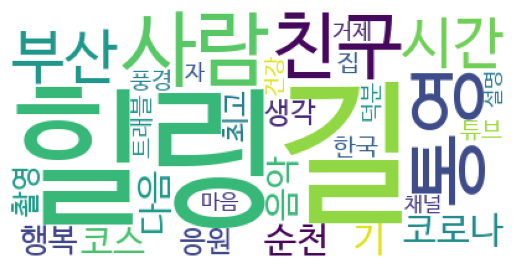

In [19]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 힐링, 길, 사람, 통영, 부산, 친구, 코로나
- 이때부터 힐링 여행이 떠오르기 시작한 것으로 예상

#### 2021

In [20]:
df_sheets_2021 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2021")['reply_clean_mecab'].items() :
  df_sheets_2021.append(df)

In [21]:
text = ' '.join(map(str, df_sheets_2021))
text_split = text.split()
text_split_count = Counter(text_split)

In [22]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [23]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

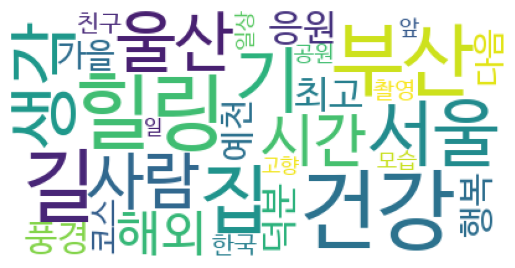

In [24]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 건강, 힐링, 부산, 서울, 집, 울산
- 20년부터 코로나로 인해 지친 사람들이 건강, 힐링 여행을 많이 찾았던 것으로 예상

#### 2022

In [25]:
df_sheets_2022 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2022")['reply_clean_mecab'].items() :
  df_sheets_2022.append(df)

In [26]:
text = ' '.join(map(str, df_sheets_2022))
text_split = text.split()
text_split_count = Counter(text_split)

In [27]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [28]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

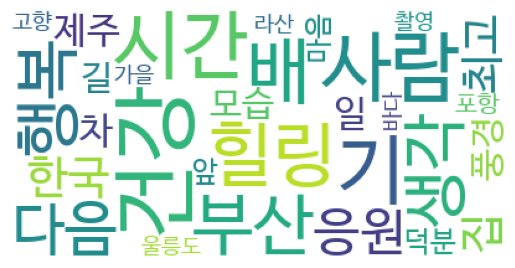

In [29]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 건강, 사람, 힐링, 부산, 시간

#### 2023

In [30]:
df_sheets_2023 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2023")['reply_clean_mecab'].items() :
  df_sheets_2023.append(df)

In [31]:
text = ' '.join(map(str, df_sheets_2023))
text_split = text.split()
text_split_count = Counter(text_split)

In [32]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [33]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

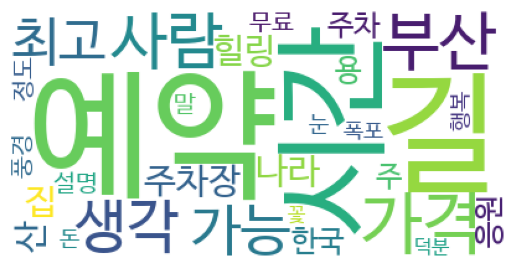

In [34]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 예약, 가격, 시간, 길, 부산, 생각
- 23년에는 부산 여행을 많이 갔다? -> 단순히 부산 여행 영상의 댓글이 많았을 수도 있음
- 주로 예약하는듯

#### 2024

In [35]:
df_sheets_2024 = []
for sheet_name, df in df_youtube_comments.query("date_year == 2024")['reply_clean_mecab'].items() :
  df_sheets_2024.append(df)

In [36]:
text = ' '.join(map(str, df_sheets_2024))
text_split = text.split()
text_split_count = Counter(text_split)

In [468]:
text_split

['연말',
 '잘',
 '마무리',
 '내년',
 '영상',
 '많이',
 '기대',
 '오늘',
 '담',
 '영상',
 '기대',
 '힐링',
 '영상',
 '감사',
 '웃음',
 '겨울',
 '강릉',
 '여행',
 '최고',
 '진짜',
 '바다',
 '너무',
 '좋',
 '보이',
 '오늘',
 '미모',
 '잘',
 '보',
 '닷',
 '여행',
 '넘',
 '좋',
 '폴라로이드',
 '또',
 '매력',
 '있',
 '더',
 '예쁘',
 '잘',
 '담기',
 '같',
 '쏘이',
 '영상',
 '보',
 '다녀오',
 '완전',
 '힐링',
 '같',
 '기대',
 '취업',
 '성공',
 '예쁘',
 '기능',
 '다',
 '인',
 '스틱',
 '구매',
 '이렇게',
 '하',
 '되',
 '행복',
 '연말',
 '여행',
 '잘',
 '봤',
 '늘',
 '행복',
 '확',
 '바다',
 '픽',
 '들',
 '사진',
 '찍',
 '너무',
 '여유',
 '좋',
 '이양',
 '조',
 '귀엽',
 '말',
 '잘',
 '하',
 '똑똑',
 '매력',
 '있',
 '찌',
 '진짜',
 '좋',
 '최애',
 '여행지',
 '겨울',
 '가',
 '정말',
 '좋',
 '국내',
 '여행',
 '영상',
 '정말',
 '사랑',
 '자주',
 '카메라',
 '너무',
 '좋',
 '보여',
 '광고',
 '길',
 '걷',
 '안녕',
 '좋',
 '브이',
 '영상',
 '감사',
 '겨울',
 '가',
 '넘',
 '좋',
 '가',
 '안',
 '즉석카메라',
 '사',
 '괜찮',
 '같',
 '바다',
 '너무',
 '이쁘',
 '맘',
 '편안',
 '웃',
 '모습',
 '보',
 '미소',
 '지',
 '궁금',
 '점',
 '나레이션',
 '멘',
 '트',
 '미리',
 '준비',
 '멘',
 '가요',
 '급',
 '궁금',
 '여행',
 '가',
 '찾아보',
 '영상',
 '구독',
 '감',
 

In [37]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [38]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

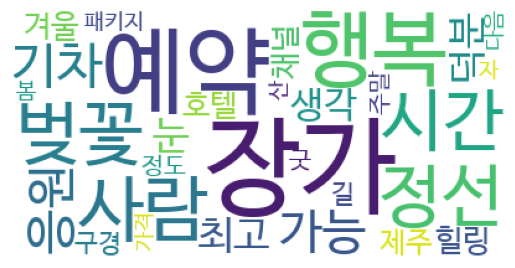

In [39]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

- 장가, 예약, 행복, 사람, 벚꽃, 기차
- 24년이 아직 5월초이므로 겨울, 벚꽃이 많이 나타나는 것으로 예상
- 마찬가지로, 예약이 크게 나타나는 이유는 상반기에 예약을 잡고 하반기에 여행을 가기 때문으로 예상

### season
- 워드클라우드 결과가 계절별 유의미하게 구분되지 않음
- 영상 업로드 날짜와 영상 촬영일에 차이가 있을 수 있으므로 분석 정확하지 않음

In [40]:
df_youtube_comments['date_month'].value_counts()

date_month
5     3728
6     3589
10    3530
9     3123
4     3027
11    2926
7     2830
3     1960
1     1864
12    1760
2     1621
8     1364
Name: count, dtype: int64

- 12, 1, 2 winter
- 3, 4, 5 spring
- 6, 7, 8 summer
- 9, 10, 11 fall

In [41]:
seasons = {
    12: '겨울', 1: '겨울', 2: '겨울',
    3: '봄', 4: '봄', 5: '봄',
    6: '여름', 7: '여름', 8: '여름',
    9: '가을', 10: '가을', 11: '가을'
}
df_youtube_comments['season'] = df_youtube_comments['date_month'].map(seasons)

In [42]:
df_youtube_comments['season'].value_counts()

season
가을    9579
봄     8715
여름    7783
겨울    5245
Name: count, dtype: int64

#### 봄

In [43]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '봄'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [44]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [45]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [46]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

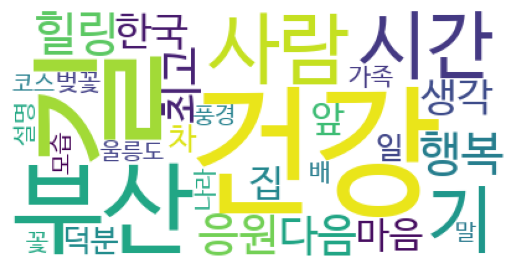

In [47]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 여름

In [48]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '여름'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [49]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [50]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [51]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

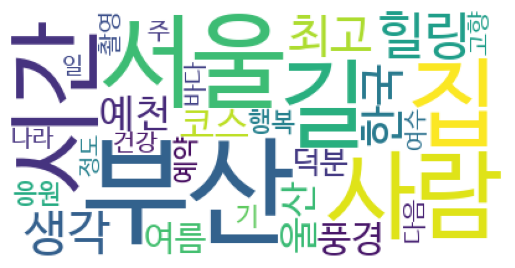

In [52]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 가을

In [53]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '가을'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [54]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [55]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [56]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

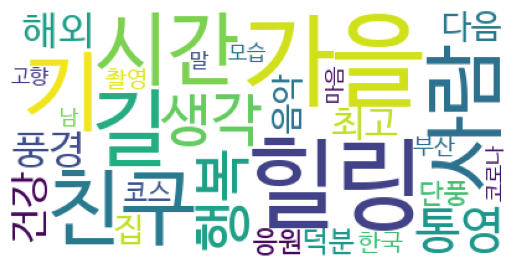

In [57]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 겨울

In [58]:
df_sheets = []
for sheet_name, df in df_youtube_comments.query("season == '겨울'")['reply_clean_mecab'].items() :
  df_sheets.append(df)

In [59]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)

In [60]:
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [61]:
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

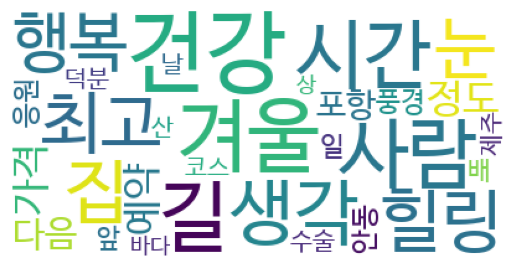

In [62]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()